# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Loading and Exploration

In [2]:
# Loading the dataset
data = pd.read_csv('../input/advertising-data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Checking for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

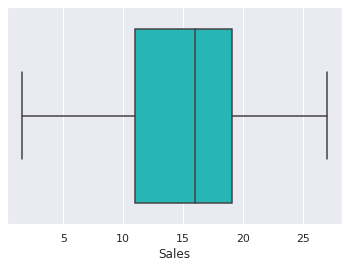

In [4]:
# Checking for Outliers
sns.boxplot(x = data['Sales'], color = '#11cccc')
plt.xlabel('Sales');

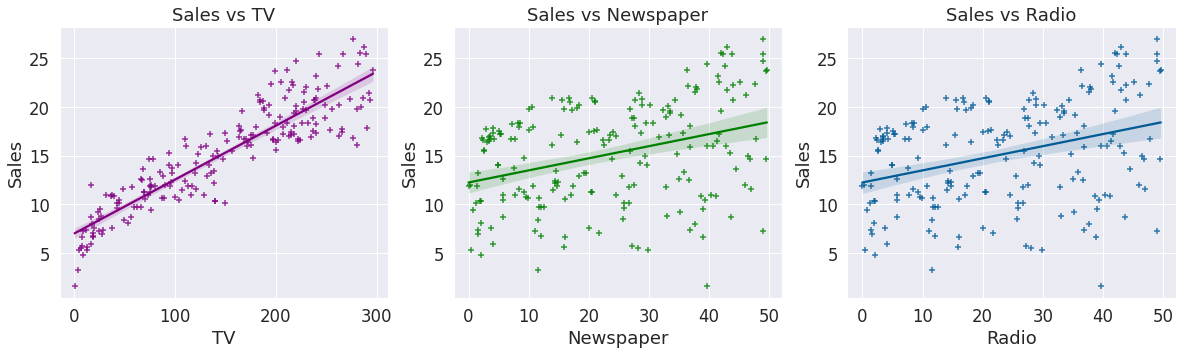

In [5]:
sns.set_context('notebook',font_scale=1.5)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

sns.regplot(x= data['TV'], y=data['Sales'], color = 'purple', marker = '+', ax = ax[0])
ax[0].set(title = 'Sales vs TV', xlabel = 'TV', ylabel = 'Sales')

sns.regplot(x= data['Radio'], y=data['Sales'],color = 'green', marker = '+', ax = ax[1])
ax[1].set(title = 'Sales vs Newspaper', xlabel = 'Newspaper', ylabel = 'Sales')

sns.regplot(x= data['Radio'], y=data['Sales'],marker= '+' ,color = '#005b96', ax = ax[2])
ax[2].set(title = 'Sales vs Radio', xlabel = 'Radio', ylabel = 'Sales')


plt.show()

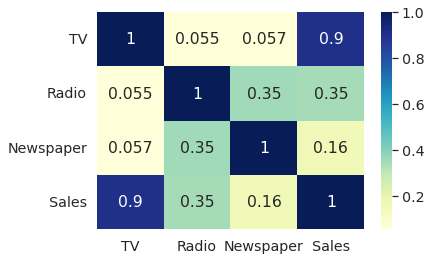

In [6]:
# Checking for correlation
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot = True)
plt.show()

# Regression

In [7]:
X = data[['TV','Radio','Newspaper']]
# X = data[['TV']] #for simple linear regression model
y = data['Sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

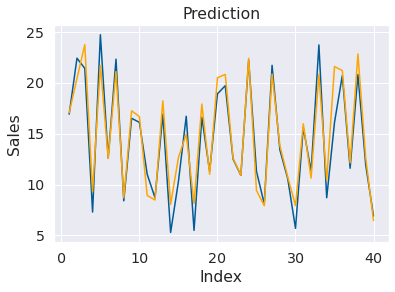

In [10]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

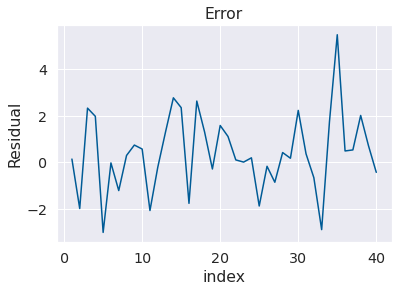

In [11]:
# Plotting the residuals
resid = y_pred - y_test
plt.plot(c, resid, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rsquare = r2_score(y_test, y_pred)

In [13]:
print('Root mean square error:', rmse)
print('R-square:', rsquare)

#with Simple Linear Regression Model
# Root mean square error: 2.467800028212657
# R-square: 0.8029184404682554

Root mean square error: 1.7052146229349223
R-square: 0.9059011844150826


In [14]:
# Intercept and coef of the line
print('Intercept of the model:', regressor.intercept_, 2)
print('Coefficient of the line:', regressor.coef_[0], 2)

Intercept of the model: 4.714126402214127 2
Coefficient of the line: 0.05450927083721978 2


In [15]:
# Thus the equation of the line is Sales = 0.06 * TV + 7.01
#Thus the equation for multiple linear regression is Sales = 0.054*TV + 0.107*Radio + 0.0003*Newspaper + 4.625

## Decision Tree Model

In [16]:
X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor=DecisionTreeRegressor()
dt_regressor.fit(X_train,y_train)

# Predicting the test set results
y_pred_dt = dt_regressor.predict(X_test)

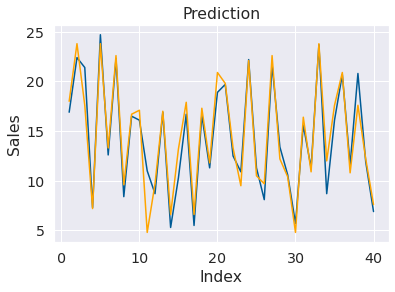

In [19]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_dt, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

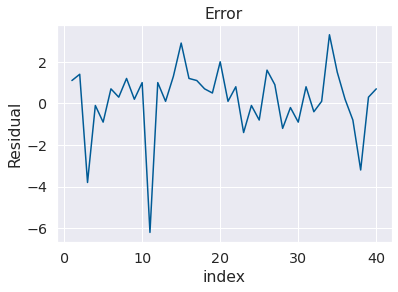

In [20]:
# Plotting the residuals
resid = y_pred_dt - y_test
plt.plot(c, resid, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

rsquare_dt = r2_score(y_test, y_pred_dt)

In [22]:
print('Root mean square error of Decision Tree model:', rmse_dt)
print('R-square of Decision Tree model:', rsquare_dt)

Root mean square error of Decision Tree model: 1.6792855623746663
R-square of Decision Tree model: 0.9087411127759206


# Random Forest

In [23]:
X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9517043503305707

In [26]:
y_pred_rf = model_rf.predict(X_test)

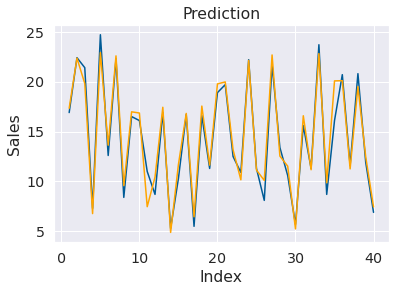

In [27]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_rf, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

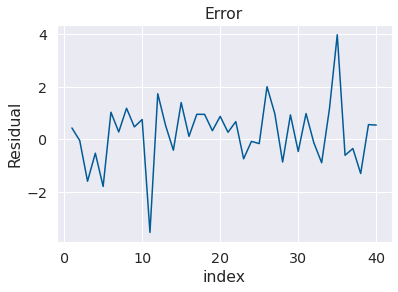

In [28]:
# Plotting the residuals
resid_rf = y_pred_rf - y_test
plt.plot(c, resid_rf, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

rsquare_rf = r2_score(y_test, y_pred_rf)

In [30]:
print('Root mean square error:', rmse_rf)
print('R-square:', rsquare_rf)

Root mean square error: 1.2216336193802144
R-square: 0.9517043503305707


# XGBoost

In [31]:
X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [33]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9531005703238631

In [34]:
y_pred_xgb = model_xgb.predict(X_test)

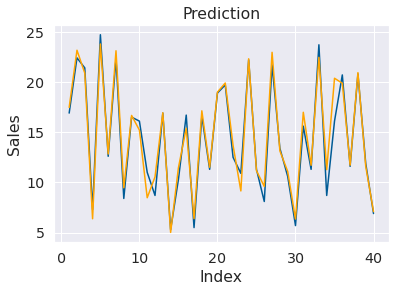

In [35]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_xgb, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

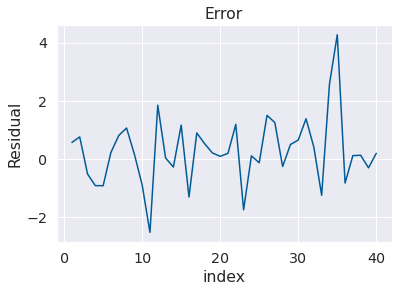

In [36]:
# Plotting the residuals
resid_xgb = y_pred_xgb - y_test
plt.plot(c, resid_xgb, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

rsquare_xgb = r2_score(y_test, y_pred_xgb)

In [38]:
print('Root mean square error:', rmse_xgb)
print('R-square:', rsquare_xgb)

Root mean square error: 1.2038454910682164
R-square: 0.9531005703238631


# CatBoost

In [39]:
X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [41]:
from catboost import CatBoostRegressor
model_cb = CatBoostRegressor(silent = True)
model_cb.fit(X_train, y_train)
model_cb.score(X_test, y_test)

0.9557055638603633

In [42]:
y_pred_cb = model_cb.predict(X_test)

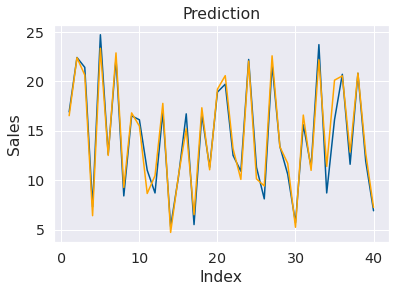

In [43]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_cb, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

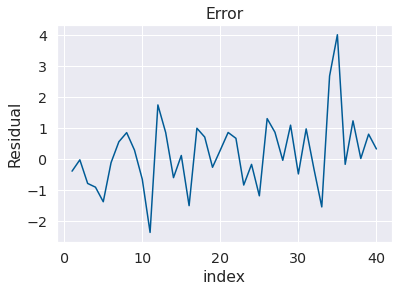

In [44]:
# Plotting the residuals
resid_cb = y_pred_cb - y_test
plt.plot(c, resid_cb, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

mse_cb = mean_squared_error(y_test, y_pred_cb)
rmse_cb = np.sqrt(mse_cb)

rsquare_cb = r2_score(y_test, y_pred_cb)

In [46]:
print('Root mean square error:', rmse_cb)
print('R-square:', rsquare_cb)

Root mean square error: 1.1699345283367477
R-square: 0.9557055638603633


# LightGBM

In [47]:
X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [49]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, y_train)
model_lgbm.score(X_test, y_test)

0.9372777597618964

In [50]:
y_pred_lgbm = model_lgbm.predict(X_test)

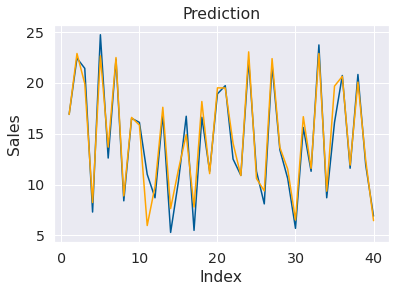

In [51]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_lgbm, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

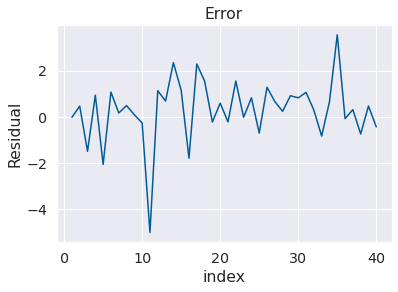

In [52]:
# Plotting the residuals
resid_lgbm = y_pred_lgbm - y_test
plt.plot(c, resid_lgbm, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

rsquare_lgbm = r2_score(y_test, y_pred_lgbm)

In [54]:
print('Root mean square error:', rmse_lgbm)
print('R-square:', rsquare_lgbm)

Root mean square error: 1.3921875656037375
R-square: 0.9372777597618964


# Support Vector Machine

In [55]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [58]:
y_pred_svm = svr.predict(X_test)

In [59]:
y_pred_svm

array([17.15330196, 19.49875585, 20.96245814,  8.60209215, 19.88553201,
       12.03803929, 19.98237498,  9.22752786, 17.73379117, 17.08961377,
        8.99691527,  9.3292374 , 18.62744348,  8.14145921, 14.08177689,
       16.00015525,  8.04682867, 17.97920438, 11.12951222, 19.55761255,
       20.0541767 , 12.95980908,  9.9170165 , 20.86239638, 10.43376345,
        9.07422216, 19.89744797, 14.71765498, 11.47650759,  8.24606316,
       16.91068571, 10.75656165, 19.72411632, 10.2142965 , 20.15216829,
       19.79413534, 10.88647539, 20.9688165 , 13.5160367 ,  7.85022468])

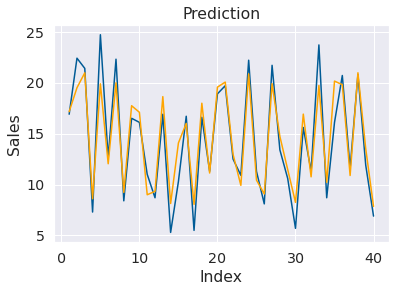

In [60]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_svm, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

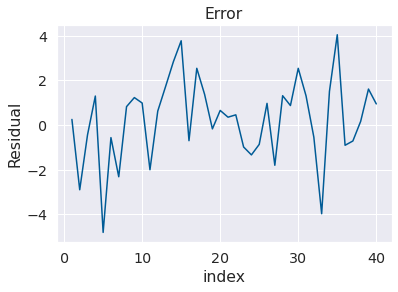

In [62]:
# Plotting the residuals
resid_svm = y_pred_svm - y_test
plt.plot(c, resid_svm, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

# Model Evaluation [Support Vector Regressor]

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

rsquare_svm = r2_score(y_test, y_pred_svm)

print('Root mean square error:', rmse_svm)
print('R-square:', rsquare_svm)

Root mean square error: 1.8705847206836834
R-square: 0.886764963148391
